# Distribution Analysis

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/SQuAD_train_augmented_DF.h5'

In [3]:
df = pd.read_hdf(data_path, 'df_train')

In [90]:
def text_extraction(text_list):
    """
    This function extracts text from a list of (text, POS)
     
    Args:
        text_list: A list containing the text to process.
    
    Returns:
        Text string separated by a space
    """
    text_list = list(map(list,text_list))
    out_text = []
    for tup in text_list:
        if type(tup[0][0]) != tuple:
            out_text.append(tup[0][0])  
    return ' '.join(out_text)

In [89]:
def pos_extraction(text_list):
    """
    This function extracts part of speech classifiers from a list of (text, POS)
     
    Args:
        text_list: A list containing the text to process.
    
    Returns:
        Part of speech classifiers.
    """
    text_list = list(map(list,text_list))
    out_pos = []
    for tup in text_list:
        if type(tup[0][0]) != tuple:
            if type(tup[0]) != str:
                out_pos.append(tup[0][1])
            else:
                out_pos.append(tup[1])
    return out_pos

In [8]:
df_sentences = pd.DataFrame(columns=['context', 'question', 'text'])

In [11]:
df_sentences['context'] = df['context'].apply(text_extraction)
df_sentences['question'] = df['question'].apply(text_extraction)
df_sentences['text'] = df['text'].apply(text_extraction)

In [14]:
df_sentences.head()

,context,question,text
0,"boston public school enrol 57,000 student atte...",mani student boston public school ?,"57,000"
1,"arizona , south gila river legal bought mexico...",name deal arizona bought ?,gadsden purchas
2,"exhibit game may also use settl challeng , pro...",exhibit game rais money ?,chariti
3,bronx featur significantli fiction literatur ....,wrote 'citi boy : adventur herbi bookbind ' ?,herman wouk
4,"new delhi govern municip govern , known new de...",new delhi municip govern overse larg indian ci...,new delhi


In [123]:
df_sentences.describe()

,context,question,text
count,67275,67275,67275
unique,29327,66136,45404
top,"1853 , victoria gave birth eighth child , leop...",s c ?,1
freq,18,10,643


In [12]:
df_pos = pd.DataFrame(columns=['context', 'question', 'text'])

In [87]:
df_pos['context'] = df['context'].apply(pos_extraction)
df_pos['question'] = df['question'].apply(pos_extraction)
df_pos['text'] = df['text'].apply(pos_extraction)

In [88]:
df_pos.head()

,context,question,text
0,"[NN, NN, NN, NN, CD, NN, NN, CD, NN, ,, NN, NN...","[NN, NN, NN, NN, NN, .]",[CD]
1,"[NN, ,, NN, NN, NN, JJ, NN, NN, NN, NN, NN, CD...","[NN, NN, NN, NN, .]","[NN, NN]"
2,"[NN, NN, MD, RB, NN, NN, NN, ,, NN, NN, NN, ,,...","[NN, NN, NN, NN, .]",[NN]
3,"[NN, NN, NN, NN, NN, ., NN, NN, NN, POS, NN, N...","[VBD, NNS, NN, :, NN, NN, NN, '', .]","[NN, NN]"
4,"[JJ, NN, NN, NN, NN, ,, VBN, JJ, NN, NN, NN, (...","[JJ, NN, NN, NN, NN, NN, JJ, NN, .]","[JJ, NN]"


In [131]:
df_pos['context'].explode().value_counts()

context
NN      3858644
,        509776
.        326071
JJ       323883
CD       258967
RB       100277
NNS       91862
)         71559
(         71503
VB        60270
IN        52592
''        51081
POS       50791
``        44175
:         32666
VBN       32142
MD        26377
VBD       18438
JJS       16689
JJR       10005
DT         6728
$          4270
VBG        3525
RBR        2332
CC         1975
WP$        1476
PRP        1163
VBP         313
#           211
LS          156
FW           17
SYM          14
WDT          12
PRP$          7
Name: count, dtype: int64

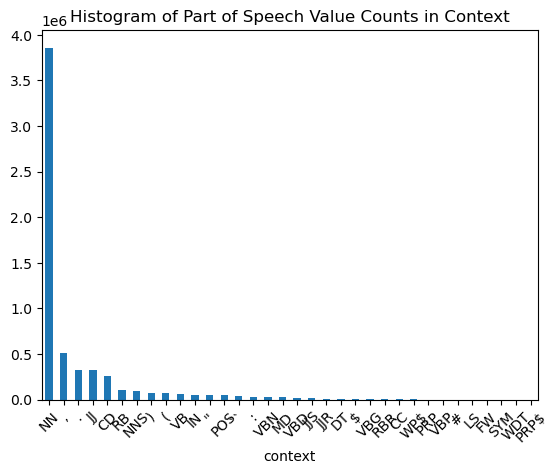

In [137]:
df_pos['context'].explode().value_counts().plot(kind='bar')
plt.title('Histogram of Part of Speech Value Counts in Context')
plt.xticks(rotation=45)
plt.show()

## Context has a large amount of nouns (NN), adjectives (JJ), and cardinal numbers (CD)

In [128]:
df_pos['question'].explode().value_counts()

question
NN      299929
.        66877
JJ       22786
CD       10570
NNS       7250
VB        6613
POS       6455
RB        5964
,         5619
VBN       2903
IN        2458
''        1901
MD        1834
JJS       1496
``        1267
VBD       1266
JJR        573
DT         502
VBG        274
WP$        264
PRP        151
RBR        117
(          105
)          103
:          102
CC          86
$           34
VBP         32
WP          20
LS          11
#            7
WDT          2
PRP$         1
Name: count, dtype: int64

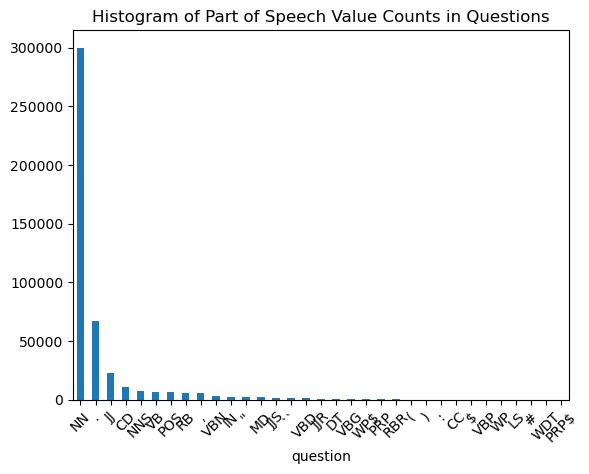

In [138]:
df_pos['question'].explode().value_counts().plot(kind='bar')
plt.title('Histogram of Part of Speech Value Counts in Questions')
plt.xticks(rotation=45)
plt.show()

## Question has a large amount of nouns (NN), adjectives (JJ), and cardinal numbers (CD)

In [129]:
df_pos['text'].explode().value_counts()

text
NN      125939
CD       18575
JJ       10595
,         5796
NNS       3292
.         1451
RB        1358
(         1074
''        1064
POS       1057
)         1050
VB         979
``         888
IN         812
MD         501
$          418
JJR        352
VBN        333
JJS        311
:          188
DT         136
VBD        128
VBG        112
CC          98
RBR         71
PRP         15
LS          11
WP$         10
VBP          6
#            5
PRP$         1
Name: count, dtype: int64

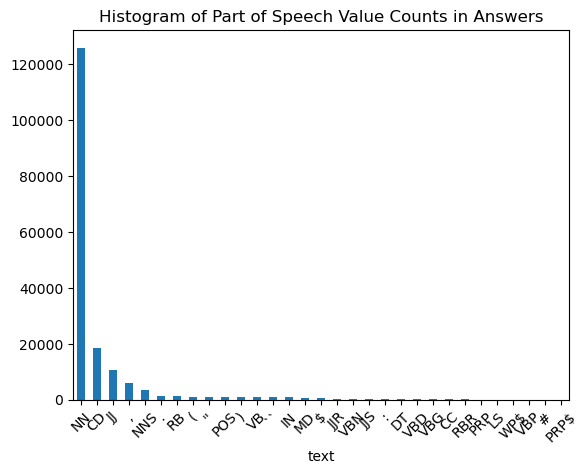

In [139]:
df_pos['text'].explode().value_counts().plot(kind='bar')
plt.title('Histogram of Part of Speech Value Counts in Answers')
plt.xticks(rotation=45)
plt.show()

## Question has a large amount of nouns (NN), cardinal numbers (CD), and adjectives (JJ)